In [1]:
import tensorflow as tf
import numpy as np

# x and y are placeholders for our training data
x = tf.placeholder("float")
y = tf.placeholder("float")
# w is the variable storing our values. It is initialised with starting "guesses"
# w[0] is the "a" in our equation, w[1] is the "b"
w = tf.Variable([1.0, 2.0], name="w")
# Our model of y = a*x + b
y_model = tf.mul(x, w[0]) + w[1]

# Our error is defined as the square of the differences
error = tf.square(y - y_model)

# The Gradient Descent Optimizer does the heavy lifting
#train_op = tf.train.GradientDescentOptimizer(0.05).minimize(error)
optimizer = tf.train.GradientDescentOptimizer(0.005)
train_op = optimizer.minimize(error)
grads_and_vars = optimizer.compute_gradients(error)
#applygrads = tf.train.Optimizer.apply_gradients(grads_and_vars, global_step=None, name=None)

//anaconda/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
print('grads_and_vars type', type(grads_and_vars),'len',len(grads_and_vars))
print('grads_and_vars[0] type', type(grads_and_vars[0]),'len(grads_and_vars[1])', len(grads_and_vars[0]))

grads_and_vars type <class 'list'> len 1
grads_and_vars[0] type <class 'tuple'> len(grads_and_vars[1]) 2


In [3]:
grad_vals = [grad for grad, _ in grads_and_vars]
len(grad_vals)

1

In [16]:
gnv_placeholder = [(tf.placeholder("float", shape=grad[1].get_shape()), grad[1]) for grad in grads_and_vars]
grad_vals = [(tf.placeholder("float", shape=grad[1].get_shape()), grad[1]) for grad in grads_and_vars]
applygrads = optimizer.apply_gradients(gnv_placeholder, global_step=None, name=None)

0 w: [ 1.  2.] gr: [array([-32.60342407,  -5.49883652], dtype=float32)] w: [ 2.17742825  2.19858289] loss: [ 98.5880127]
100 w: [ 2.63496852  3.23605514] gr: [array([-4.18369436, -1.40703201], dtype=float32)] w: [ 2.68705797  3.25357342] loss: [ 0.76723301]
200 w: [ 2.38075972  3.94833589] gr: [array([ 0.43249089,  0.06377029], dtype=float32)] w: [ 2.30878186  3.93772292] loss: [ 0.28159261]
300 w: [ 2.20942473  4.4316659 ] gr: [array([-1.26386893, -0.2179985 ], dtype=float32)] w: [ 2.25049162  4.43874931] loss: [ 0.12543763]
400 w: [ 2.02887368  4.79890156] gr: [array([-2.42231345, -0.38514709], dtype=float32)] w: [ 2.15711308  4.81929159] loss: [ 1.03938174]
500 w: [ 2.19914126  5.10935116] gr: [array([ 0.14847058,  0.03214836], dtype=float32)] w: [ 2.19645858  5.10877037] loss: [ 0.00084356]
600 w: [ 2.11051011  5.32675362] gr: [array([ 0.07670961,  0.0114975 ], dtype=float32)] w: [ 2.10196209  5.32547235] loss: [ 0.00410371]
700 w: [ 2.07814741  5.49302816] gr: [array([-1.31556332,

//anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


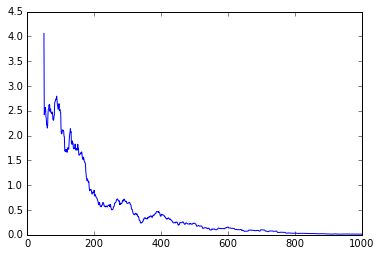

In [17]:
# Normal TensorFlow - initialize values, create a session and run the model
model = tf.initialize_all_variables()

errors = []
with tf.Session() as session:
    session.run(model)
    #Start of loop
    for i in range(1000):
        x_train = tf.random_normal((1,), mean=5, stddev=2.0)
        y_train = x_train * 2 + 6
        
        x_value, y_value = session.run([x_train, y_train])
        w_b = session.run(w)
        
        _, error_value = session.run([train_op, error], feed_dict={x: x_value, y: y_value})
        
        errors.append(error_value)

        if i % 100 == 0:
            grads_and_vars = optimizer.compute_gradients(error)
            grad_vals = session.run([grad for grad, _ in grads_and_vars], feed_dict={x: x_value, y: y_value})
            w_a = session.run(w)
            #print(i, 'gr:',grad_vals,'loss:',error_value,'w:', w_value)
            print(i, 'w:', w_b, 'gr:',grad_vals,'w:', w_a, 'loss:',error_value,)
            
    # End of loop     
    w_value = session.run(w)
    print("Predicted model: {a:.3f}x + {b:.3f}".format(a=w_value[0], b=w_value[1]))

import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()
plt.savefig("errors.png")